In [97]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

invoice = pd.read_csv(r'C:\Users\Anthony\Downloads\fct_invoice.csv')

print(invoice)

      invoice_no  customer_id         category  quantity    price  \
0        I138884          229         Clothing         5  1500.40   
1        I317333         3433            Shoes         3  1800.51   
2        I127801          644         Clothing         1   300.08   
3        I173702         4900            Shoes         5  3000.85   
4        I337046         1089            Books         4    60.60   
...          ...          ...              ...       ...      ...   
99452    I219422         2344         Souvenir         5    58.65   
99453    I325143          172  Food & Beverage         2    10.46   
99454    I824010          425  Food & Beverage         2    10.46   
99455    I702964          577       Technology         4  4200.00   
99456    I232867           30         Souvenir         3    35.19   

      payment_method invoice_date     shopping_mall  
0        Credit Card     5/8/2022            Kanyon  
1         Debit Card   12/12/2021    Forum Istanbul  
2        

In [99]:
customer = pd.read_json(r"C:\Users\Anthony\Downloads\dim_customer.json")

print(customer)

       age first_name gender     id last_name
0     48.0   Nicholas      M      0    Flores
1      NaN    Jeffery      M      1      Rowe
2     57.0     Alexis      F      2    Benton
3     73.0        Amy      F      3   Johnson
4     20.0      David      M      4     Moore
...    ...        ...    ...    ...       ...
5186   NaN     Arthur      M   9428    Harris
5187   NaN      David      M   9494       Roy
5188  85.0     Thomas      M  10350    Turner
5189   NaN      April      F  10587   Sanchez
5190   NaN     Andrew      M  10934   Compton

[5191 rows x 5 columns]


In [101]:
#1 Easy: How many unique customers are in the dataset?

unique_customer = customer['id'].nunique()
print(unique_customer)

5191


In [103]:
#2 Easy: What are the different categories of products available? How many unique categories are there?

unique_categories = invoice['category'].unique()
count_categories = invoice['category'].nunique()
print(count_categories)
print(unique_categories)

8
['Clothing' 'Shoes' 'Books' 'Cosmetics' 'Food & Beverage' 'Toys'
 'Technology' 'Souvenir']


In [105]:
#3 Easy: Which payment method is the most popular? How many times was it used?

popular_payment_method = invoice['payment_method'].value_counts()
print(popular_payment_method)

payment_method
Cash           44447
Credit Card    34931
Debit Card     20079
Name: count, dtype: int64


In [107]:
#1 Medium: What are the three most popular categories, by total sales?

invoice['sales'] = invoice['price']*invoice['quantity']
category_sales = invoice.groupby('category')['sales'].sum().reset_index()
popular_category = category_sales.sort_values('sales', ascending=False)

print(popular_category.head(3))

     category         sales
1    Clothing  1.139968e+08
4       Shoes  6.655345e+07
6  Technology  5.786235e+07


In [109]:
#2 Medium: What are the total sales attributed to customers over the age of 45?

merged_df = pd.merge(invoice, customer, left_on='customer_id', right_on='id')
over_45_sales = merged_df[merged_df['age'] > 45]
over_45_total_sales = over_45_sales['sales'].sum()
print(over_45_total_sales)

82039768.15


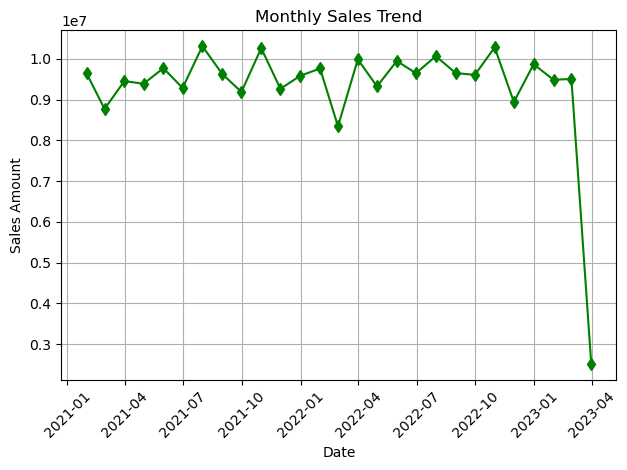

In [149]:
#3 Medium: How is the data distributed across different invoice dates? Are there any seasonal trends or patterns? (Use a graph for this.)

invoice.index = pd.to_datetime(invoice.index, format='%d/%m/%Y')
monthly_sales = invoice['sales'].resample('M').sum()

plt.figure()
plt.plot(monthly_sales.index, monthly_sales.values, marker='d', color='g', linestyle='-')
plt.title('Monthly Sales Trend')
plt.xlabel('Date')
plt.ylabel('Sales Amount')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [179]:
#1 Hard: Create a pivot table showing the breakdown of sales across these dimensions, in this order: category, decade age range (e.g., 10-19, 20-29, and so forth).

merged_df['decade_age_range'] = pd.cut(merged_df['age'], bins=[10, 19, 29, 39, 49, 59, 69, 79, 89, 99], labels=['10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89', '90-99'])
pivot_table = pd.pivot_table(merged_df, index='category', columns='decade_age_range', values='sales', aggfunc='sum', fill_value=0)
print("Pivot Table - Sales Breakdown by Category and Decade Age Range:")
print(pivot_table)

Pivot Table - Sales Breakdown by Category and Decade Age Range:
decade_age_range       10-19        20-29        30-39        40-49  \
category                                                              
Books               12801.75     79461.75     84143.10     87203.40   
Clothing          1927413.84  10250732.80  11354126.96  11215189.92   
Cosmetics          109619.36    605915.32    723544.70    665034.96   
Food & Beverage     13582.31     73491.96     87246.86     89553.29   
Shoes              993281.35   5924878.24   7200839.66   7025590.02   
Souvenir            12375.15     54943.32     64092.72     66391.80   
Technology        1129800.00   5261550.00   6159300.00   5954550.00   
Toys                60426.24    385100.80    420582.40    390906.88   

decade_age_range        50-59        60-69       70-79       80-89  90-99  
category                                                                   
Books                74962.20     80476.80    54827.85    26664.00    0.0